# Linear regression from 

Let's implement different components of Linear Regression algorithm specifically **model inference, loss function, optimization and evaluation measures** in a vectorized form from scratch using basic python libraries like numpy.

We will demonstrate working of our implementation on a couple of synthetic datasets.

## Quick recap

A quick recap of vectorized operations for these components:

1. Training data contains features and label that is real number.
2. Model or inference: $\mathbf{y} = \mathbf{X}\mathbf{w}$
3. Loss function: $J(\mathbf{w}) = \frac{1}{2} (\mathbf{X}\mathbf{w} - \mathbf{y})^T (\mathbf{X}\mathbf{w} - \mathbf{y})$
4. Optimization:
  * Normal equation: 
  * Gradient descent: 
5. RMSE: $\sqrt{\frac{2}{n} J(\mathbf{w})}$


Let's first import necessary libraries

In [1]:
from IPython.display import display, Math, Latex  # Imported for proper rendering of latex in colab.

import numpy as np

# Import for generating plots
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# C1: Training Data

In [2]:
# Create a dataset of 100 examples with a single feature and a label.
# For this construction, we use the following three parameters:
w1 = 3
w0 = 4
n = 100

X = 10 * np.random.rand(
    n,
)

# Obtain y = 4 + 3*x + noise.  Noise is randomly sampled.
y = (
    w0
    + w1 * X
    + np.random.randn(
        n,
    )
)

Let's examine the shapes of training data for sanity check.

In [3]:
print("Shape of the training data feature matrix:", X.shape)
print("Shape of label vector:", y.shape)

Shape of the training data feature matrix: (100,)
Shape of label vector: (100,)


Let's divide the data into training and test set.  We will set aside 20% examples for testing.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Let's do a quick sanity check to make sure the sizes of feature and labels sets are identical both in training and test sets:

In [5]:
print("Shape of training feature matrix:", X_train.shape)
print("Shape of training label vector:", y_train.shape)

print("Shape of test feature matrix:", X_test.shape)
print("Shape of test label vector:", y_test.shape)

Shape of training feature matrix: (80,)
Shape of training label vector: (80,)
Shape of test feature matrix: (20,)
Shape of test label vector: (20,)


Let's quickly check the first few examples and labels

In [6]:
X_train[:5]

array([2.66264564, 5.2778843 , 7.14629389, 5.3417576 , 9.21518806])

In [7]:
y_train[:5]

array([14.41877402, 22.35106895, 25.05583962, 19.649562  , 32.52076056])

Let's visualize the training set.

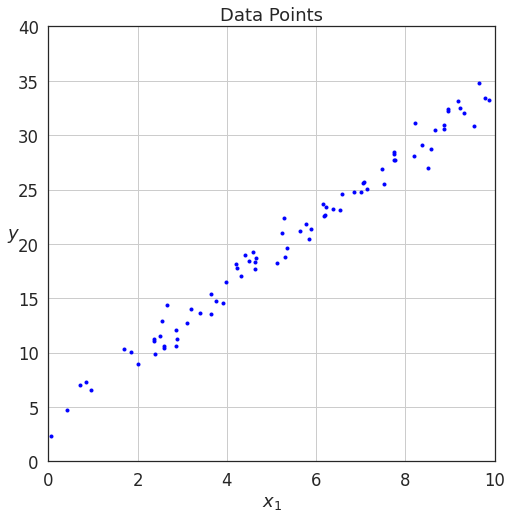

In [8]:
sns.set_style("white")
f = plt.figure(figsize=(8, 8))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

plt.plot(X_train, y_train, "b.")
plt.title("Data Points")
plt.grid(True)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 10, 0, 40])

plt.show()

We have a training set consisting a single feature so we will fit a simple linear regression model with one feature.  It's form is: $y = w_0 + w_1 x_1$.  

As discussed in the lectures, we add a special dummy feature $x_0$ and set it to 1.  We create a helper function for that.

In [9]:
def add_dummy_feature(x):
    """Adds a dummry feature to the dataset.

    Args:
      x: Training dataset

    Returns:
      Training dataset with an addition of dummy feature.
    """
    # np.ones(x.shape[0]) create a vector of 1's having the same number of
    # rows as number of samples in dataset.
    return np.column_stack((np.ones(x.shape[0]), x))

Let's write a test case to test this function: 

For that let's take two examples and three features.  The first example is a feature vector:
\begin{eqnarray}
\mathbf{x}^{(1)}_{3 \times 1} &=&  \begin{bmatrix}
      3 \\
      2 \\
      5 \\
    \end{bmatrix}
\end{eqnarray}

And the second example is:
\begin{eqnarray}
\mathbf{x}^{(2)}_{3 \times 1} &=&  \begin{bmatrix}
      9 \\
      4 \\
      7 \\
    \end{bmatrix}
\end{eqnarray}

And recall that a fecture matrix $\mathbf{X}$ has shape $(n, m+1)$ corresponding to features of all examples.
  \begin{equation}
    \mathbf{X}_{n \times (m+1)} = \begin{bmatrix}
        - \left(\mathbf{x}^{(1)}\right)^T - \\
        - \left(\mathbf{x}^{(2)}\right)^T - \\
        \vdots \\
        - \left(\mathbf{x}^{(n)}\right)^T - \\
      \end{bmatrix}
  \end{equation}

The corresponding feature matrix $\mathbf{X}$ appears as follows:
\begin{eqnarray}
  \mathbf{X}_{2 \times 3} &=&  \begin{bmatrix}
      3 & 2 & 5 \\
      9 & 4 & 7 \\
    \end{bmatrix} \\
\end{eqnarray}

Here the feature vectors are transposed and represented as rows:
* The first row corresponds to the first example $\left(\mathbf{x}^{(1)}\right)^T$ and 
* The second row corresponds to the second example $\left(\mathbf{x}^{(2)}\right)^T$.

Once we add the dummy feature, the resulting matrix becomes:
\begin{eqnarray}
  \mathbf{X}_{2\times 4} &=&  \begin{bmatrix}
      1 & 3 & 2 & 5\\
      1 & 9 & 4 & 7\\
    \end{bmatrix}
\end{eqnarray}

In [10]:
import unittest


class TestAddDummyFeature(unittest.TestCase):
    def test_add_dummy_feature(self):
        """Test case function for add_dummy_feature"""
        train_matrix = np.array([[3, 2, 5], [9, 4, 7]])
        train_matrix_with_dummy_feature = add_dummy_feature(train_matrix)

        # test the shape
        self.assertEqual(train_matrix_with_dummy_feature.shape, (2, 4))

        # and contents
        np.testing.assert_array_equal(train_matrix_with_dummy_feature, np.array([[1, 3, 2, 5], [1, 9, 4, 7]]))


unittest.main(argv=[""], defaultTest="TestAddDummyFeature", verbosity=2, exit=False)

test_add_dummy_feature (__main__.TestAddDummyFeature)
Test case function for add_dummy_feature ... ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


In [11]:
add_dummy_feature(np.array([[3, 2], [5, 4]]))

array([[1., 3., 2.],
       [1., 5., 4.]])

Let's preprocess the training set to add the dummy feature

In [12]:
print("Before adding the dummy feature:\n", X_train[:5])
print("\n")

X_train_with_dummy = add_dummy_feature(X_train)

print("After adding the dummy feature:\n", X_train_with_dummy[:5, :])

Before adding the dummy feature:
 [2.66264564 5.2778843  7.14629389 5.3417576  9.21518806]


After adding the dummy feature:
 [[1.         2.66264564]
 [1.         5.2778843 ]
 [1.         7.14629389]
 [1.         5.3417576 ]
 [1.         9.21518806]]


# C2. Model

Linear regression model uses linear combination of features to obtain output labels.  In vectorized form, this can be written as $\mathbf{y} = \mathbf{X} \mathbf{w}$


**Note** 

* Model is parameterized by its weight vector.  
* It is described by its mathematical form and weight vector.

## Implementation

The general vectorized form is as follows:
$$
  \mathbf{y}_{n \times 1} = \mathbf{X}_{n \times (m+1)} \mathbf{w}_{(m+1) \times 1}
$$

where 
* $n$ is number of examples in dataset (train/test/validation). 
* $m$ is the number of features.
* $\mathbf{X}$ is a feature matrix contain $(m+1)$ features for $n$ examples along rows. (Notice capital case bold **X** used for matrix).
* $\mathbf{w}$ is a weight vector containing $(m+1)$ weights one for each feature. (notice small case bold **w**).
* $\mathbf{y}$ is a label vector containing labels for $n$ examples with shape $(n,)$.

In [13]:
def predict(X, w):
    """Prediction of output label for a given input.

    Args:
      X: Feature matrix of shape (n, m+1).
      w: weight vector of shape (m+1, n)

    Returns:
      y: Predicted label vector of shape (n,).
    """
    # Check to make sure that feature matrix and weight vector have compatible
    # shapes.
    assert X.shape[-1] == w.shape[0], "X and w don't have compatible dimensions"
    return X @ w

We test this function with the following feature matrix $\mathbf{X}_{2 \times (3+1)}$:

\begin{eqnarray}
  \mathbf{X}_{2 \times 4} &=&  \begin{bmatrix}
      1 & 3 & 2 & 5 \\
      1 & 9 & 4 & 7 \\
    \end{bmatrix} \\
\end{eqnarray}

and weight vector $\mathbf{w}$
\begin{eqnarray}
  \mathbf{w}_{4 \times 1} &=&  \begin{bmatrix}
      1 \\
      1 \\
      1 \\
      1 \\
    \end{bmatrix} \\
\end{eqnarray}

<!-- In this example, we have three features and hence we use the following linear regression model: 
\begin{eqnarray}
  \mathbf{w}: y &=& \sum_{j=0}^{3} w_j x_j \\
    &=& w_0 x_0 + w_1 x_1 + w_2 x_2 + w_3 x_3  = \\
    &=& 1 + 1 x_1 + 1 x_2 + 1 x_3\\
    &=& x_0 + x_1 + x_2 + x_3
\end{eqnarray}

The prediction 
* for the first example is: $y_1 = 1 + 3 + 2 + 5 = 11$ and 
* for the second example is: $y_2 = 1 + 9 + 4 + 7 = 21$ -->

Let's perform matrix-vector multiplication between the feature matrix $\mathbf{X}$ and a weight vector $\mathbf{w}$ to obtain labels for all examples:
\begin{eqnarray}
\mathbf{y} &=& \mathbf{X} \color{red}{\mathbf{w}} \\
  &=& \begin{bmatrix}
        \color{blue}{1} & \color{blue}{3} & \color{blue}{2} & \color{blue}{5} \\
        \color{purple}{1} & \color{purple}{9} & \color{purple}{4} & \color{purple}{7} \\
      \end{bmatrix}
    \times 
    \begin{bmatrix}
      \color{red}{1} \\
      \color{red}{1} \\
      \color{red}{1} \\
      \color{red}{1} \\
    \end{bmatrix} \\
    &=& \begin{bmatrix}
        \color{blue}{1} \times \color{red}{1} + \color{blue}{3} \times \color{red}{1} + \color{blue}{2} \times \color{red}{1} + \color{blue}{5} \times \color{red}{1}  \\
        \color{purple}{1} \times \color{red}{1} + \color{purple}{3} \times \color{red}{1} + \color{purple}{2} \times \color{red}{1} + \color{purple}{5} \times \color{red}{1} 
      \end{bmatrix} \\
    &=&
    \begin{bmatrix}
      11 \\ 
      21
    \end{bmatrix} \\
\end{eqnarray}



In [14]:
import unittest


class TestPredict(unittest.TestCase):
    def test_predict(self):
        """Test case predict function of linear regression"""
        # set up
        train_matrix = np.array([[1, 3, 2, 5], [1, 9, 4, 7]])
        weight_vector = np.array([1, 1, 1, 1])
        expected_label_vector = np.array([11, 21])

        # call
        predicted_label_vector = predict(train_matrix, weight_vector)

        # asserts
        # test the shape
        self.assertEqual(predicted_label_vector.shape, (2,))

        # and contents
        np.testing.assert_array_equal(expected_label_vector, predicted_label_vector)


unittest.main(argv=[""], defaultTest="TestPredict", verbosity=2, exit=False)

test_predict (__main__.TestPredict)
Test case predict function of linear regression ... ok

----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


## Demonstration on synthetic dataset

In [15]:
# @title Dataset: $n=100$, $m=1$, $[w_0, w_1] = [4, 3]$
def generate_data(n):
    """Generates a syntic data with $n$ points.

    The training features are generated with random samples. The
    label for each example is generated with the following
    relationship: y = 4 + 3*feature_value + random_noise.

    Args:
      n: Number of data points

    Returns:
      (X, y): pair of feature matrix and label vector.
    """
    w1 = 3
    w0 = 4
    X = 10 * np.random.rand(
        n,
    )

    # Obtain y = 4 + 3*x + noise.  Noise is randomly sampled.
    y = (
        w0
        + w1 * X
        + np.random.randn(
            n,
        )
    )
    return X, y


X, y = generate_data(n=100)

In [16]:
# @title Preprocessing: Dummy feature and train-test split
from sklearn.model_selection import train_test_split


def add_dummy_feature(x):
    """Adds a dummy feature to the dataset.

    Args:
      x: Training dataset

    Returns:
      Training dataset with an addition of dummy feature.
    """
    # np.ones(x.shape[0]) create a vector of 1's having the same number of
    # rows as number of samples in dataset.
    return np.column_stack((np.ones(x.shape[0]), x))


def preprocess(X, y):
    """Preprocesses training set and splits it into train/test.

    Args:
      X: Training feature matrix
      y: Training labels

    Returns:
      (X_train, X_test, y_train, y_test)
    """
    X_with_dummy_feature = add_dummy_feature(X)
    return train_test_split(X_with_dummy_feature, y, test_size=0.20, random_state=42)


X_train, X_test, y_train, y_test = preprocess(X, y)

Since we have not yet trained our model, let's use a random weight vector to get predictions from our model for the given dataset: 

In [17]:
w = np.random.rand(
    2,
)
w

array([0.7544478 , 0.99493283])

In [18]:
y_hat = predict(X_train, w)

Let's compare the prediction with the actual value:

In [19]:
y_hat[:10]

array([8.40126361, 5.95166443, 1.87485789, 6.30904185, 7.08430428,
       3.92799696, 8.55891733, 1.96791787, 3.37120937, 7.3224093 ])

Actual labels are

In [20]:
y_train[:10]

array([26.61862727, 21.04746492,  7.96318521, 23.33656661, 24.17463552,
       13.04634202, 27.74065111,  7.14788236, 11.58211279, 23.87376769])

Since we used a random weight vector $\mathbf{w}$ here, most of the predicted labels do not match the actual labels.

## Comparison of vectorized and non-vectorized version of model inference

In [21]:
def non_vectorized_predict(X, w):
    """Prediction of output label for a given input.

    Args:
      X: Feature matrix of shape (n, m+1).
      w: weight vector of shape (m+1, n)

    Returns:
      y: Predicted label vector of shape (n, ).
    """
    y = []
    for i in range(0, X.shape[0]):
        y_hat_i = 0
        for j in range(0, X.shape[1]):
            y_hat_i += X[i][j] * w[j]
        y.append(y_hat_i)
    return np.array(y)

Let's write a test for this function with the same set up as the vectorized implementation.


In [22]:
import unittest


class TestPredictNonVectorized(unittest.TestCase):
    def test_predict_non_vectorized(self):
        """Test case predict function of linear regression"""
        # set up
        train_matrix = np.array([[1, 3, 2, 5], [1, 9, 4, 7]])
        weight_vector = np.array([1, 1, 1, 1])
        expected_label_vector = np.array([11, 21])

        # call
        predicted_label_vector = non_vectorized_predict(train_matrix, weight_vector)

        # asserts
        # test the shape
        self.assertEqual(predicted_label_vector.shape, (2,))

        # and contents
        np.testing.assert_array_equal(expected_label_vector, predicted_label_vector)


unittest.main(argv=[""], defaultTest="TestPredictNonVectorized", verbosity=2, exit=False)

test_predict_non_vectorized (__main__.TestPredictNonVectorized)
Test case predict function of linear regression ... ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


Let's compare run time of vectorized and non-vectorized versions on dataset with 100 examples.

In [23]:
import time

start_time = time.time()
y_hat_vectorized = predict(X_train, w)
end_time = time.time()

print("Total time incurred in vectorized inference is: %0.6f s" % (end_time - start_time))

start_time = time.time()
y_hat_non_vectorized = non_vectorized_predict(X_train, w)
end_time = time.time()
print("Total time incurred in non-vectorized inference is: %0.6f s" % (end_time - start_time))

np.testing.assert_array_equal(y_hat_vectorized, y_hat_non_vectorized)

Total time incurred in vectorized inference is: 0.000118 s
Total time incurred in non-vectorized inference is: 0.000353 s


Let's try to check the difference in their performance on large dataset of 1 million data points.

In [24]:
X, y = generate_data(n=1000000)
X_train, X_test, y_train, y_test = preprocess(X, y)

start_time = time.time()
y_hat_vectorized = predict(X_train, w)
end_time = time.time()
print("Total time incurred in vectorized inference is: %0.6f s" % (end_time - start_time))

start_time = time.time()
y_hat_non_vectorized = non_vectorized_predict(X_train, w)
end_time = time.time()
print("Total time incurred in non-vectorized inference is: %0.6f s" % (end_time - start_time))

np.testing.assert_array_equal(y_hat_vectorized, y_hat_non_vectorized)

Total time incurred in vectorized inference is: 0.002506 s
Total time incurred in non-vectorized inference is: 1.381545 s


Note that the time required for non-vectorized inference is order of magnitude more than the vectorized inference.

# C3. Loss function implementation

## Implementation

The loss function is calculated as follows:

\begin{equation}
J(\mathbf{w}) = \frac{1}{2} \left(\mathbf{X}\mathbf{w} - \mathbf{y} \right)^T \left(\mathbf{X}\mathbf{w} - \mathbf{y} \right)
\end{equation}

where 
* $\mathbf{X}$ is a feature matrix contain $(m+1)$ features for $n$ examples along rows.
* $\mathbf{w}$ is a weight vector containing $(m+1)$ weights one for each feature.
* $\mathbf{y}$ is a label vector containing labels for $n$ examples in a vector of shape $(n,)$.

In [25]:
def loss(X, y, w):
    """Calculates loss for a model based on known labels.

    Args:
      X: Feature matrix for given inputs.
      y: Output label vector as predicted by the given model.
      w: Weight vector

    Returns:
      Loss
    """
    e = predict(X, w) - y
    return (1 / 2) * (np.transpose(e) @ e)

We will test this function with the following configuration:

1. Feature matrix ($\mathbf{X}$): 
\begin{eqnarray}
  \mathbf{X}_{2 \times 4} &=&  \begin{bmatrix}
      1 & 3 & 2 & 5 \\
      1 & 9 & 4 & 7 \\
    \end{bmatrix} \\
\end{eqnarray}

2. Weight vector ($\mathbf{w}$):
\begin{eqnarray}
  \mathbf{w}_{4 \times 1} &=&  \begin{bmatrix}
      1 \\
      1 \\
      1 \\
      1 \\
    \end{bmatrix} \\
\end{eqnarray}

3. Label vector $\mathbf{y}$:
  \begin{eqnarray}
  \mathbf{y}_{2 \times 1} &=&  \begin{bmatrix}
      6 \\
      11
    \end{bmatrix} \\
   \end{eqnarray}



Let's compute the loss $J(\mathbf{w})$ i.e. 
\begin{eqnarray}
  J\left(\begin{bmatrix}
      1 \\
      1 \\
      1 \\
      1 \\
    \end{bmatrix} \right) &=& \frac{1}{2} \left(\mathbf{X}\mathbf{w} - \mathbf{y} \right)^T \left(\mathbf{X}\mathbf{w} - \mathbf{y} \right)  \\
     &=& \frac{1}{2} \left( \begin{bmatrix}
        \color{blue}{1} & \color{blue}{3} & \color{blue}{2} & \color{blue}{5} \\
        \color{purple}{1} & \color{purple}{9} & \color{purple}{4} & \color{purple}{7} \\
      \end{bmatrix}
    \times 
    \begin{bmatrix}
      \color{red}{1} \\
      \color{red}{1} \\
      \color{red}{1} \\
      \color{red}{1} 
    \end{bmatrix} - \begin{bmatrix}
      6 \\
      11
    \end{bmatrix}
      \right)^T  \left( \begin{bmatrix}
        \color{blue}{1} & \color{blue}{3} & \color{blue}{2} & \color{blue}{5} \\
        \color{purple}{1} & \color{purple}{9} & \color{purple}{4} & \color{purple}{7} \\
      \end{bmatrix}
    \times 
    \begin{bmatrix}
      \color{red}{1} \\
      \color{red}{1} \\
      \color{red}{1} \\
      \color{red}{1} 
    \end{bmatrix} - \begin{bmatrix}
      6 \\
      11
    \end{bmatrix} \right) \\
    &=& \frac{1}{2} \left(
      \begin{bmatrix}
      11 \\
      21
    \end{bmatrix} - 
    \begin{bmatrix}
      6 \\
      11
    \end{bmatrix}
      \right)^T  
      \left(
      \begin{bmatrix}
      11 \\
      21
    \end{bmatrix} - 
    \begin{bmatrix}
      6 \\
      11
    \end{bmatrix}
      \right)\\
    &=& \frac{1}{2}
      \left(
      \begin{bmatrix}
      5 \\
      10
    \end{bmatrix} 
      \right)^T \left(
      \begin{bmatrix}
      5 \\
      10
    \end{bmatrix} 
      \right) \\
   &=& \frac{1}{2}
      \left(
      \begin{bmatrix}
      5 & 10
    \end{bmatrix}  
    \begin{bmatrix}
      5 \\
      10
    \end{bmatrix}
      \right) \\
  &=& \frac{1}{2}
      \left(
      \begin{bmatrix}
      5 \times 5 + 10 \times 10
    \end{bmatrix}  
      \right) \\
  &=& \frac{1}{2} [125] = [62.5]
\end{eqnarray}

In [26]:
import unittest


class TestLossFunction(unittest.TestCase):
    def test_loss_function(self):
        """Test case for loss function of linear regression"""
        # set up
        feature_matrix = np.array([[1, 3, 2, 5], [1, 9, 4, 7]])
        weight_vector = np.array([1, 1, 1, 1])
        label_vector = np.array([6, 11])
        expected_loss = np.array([62.5])

        # call
        loss_value = loss(feature_matrix, label_vector, weight_vector)

        # asserts
        # test the shape
        self.assertEqual(loss_value.shape, ())

        # and contents
        np.testing.assert_array_equal(expected_loss, loss_value)


unittest.main(argv=[""], defaultTest="TestLossFunction", verbosity=2, exit=False)

test_loss_function (__main__.TestLossFunction)
Test case for loss function of linear regression ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


Since we have not yet trained our model, let's use a random weight vector to calculate loss for linear regression model with single feature on synthetic dataset.

In [27]:
w = np.random.rand(
    2,
)

## Demonstration on synthetic dataset

In [28]:
# @title [Generate training data]
def generate_data(n):
    """Generates a syntic data with $n$ points.

    The training features are generated with random samples. The
    label for each example is generated with the following
    relationship: y = 4 + 3*feature_value + random_noise.

    Args:
      n: Number of data points

    Returns:
      (X, y): pair of feature matrix and label vector.
    """
    w1 = 3
    w0 = 4
    X = 10 * np.random.rand(
        n,
    )

    # Obtain y = 4 + 3*x + noise.  Noise is randomly sampled.
    y = (
        w0
        + w1 * X
        + np.random.randn(
            n,
        )
    )
    return X, y

In [29]:
# @title [Preprocessing: Dummy feature and train-test split]
from sklearn.model_selection import train_test_split


def add_dummy_feature(x):
    """Adds a dummy feature to the dataset.

    Args:
      x: Training dataset

    Returns:
      Training dataset with an addition of dummy feature.
    """
    # np.ones(x.shape[0]) create a vector of 1's having the same number of
    # rows as number of samples in dataset.
    return np.column_stack((np.ones(x.shape[0]), x))


def preprocess(X, y):
    """Preprocesses training set and splits it into train/test.

    Args:
      X: Training feature matrix
      y: Training labels

    Returns:
      (X_train, X_test, y_train, y_test)
    """
    X_with_dummy_feature = add_dummy_feature(X)
    return train_test_split(X_with_dummy_feature, y, test_size=0.20, random_state=42)

In [30]:
X, y = generate_data(100)  # y = 4 + 3 x_1 + noise
X_train, X_test, y_train, y_test = preprocess(X, y)

In [31]:
# @title [Visualize error for each data point]


def visualize_loss_for_single_feature_model(X, y, w):
    """Plots loss for the model for a given dataset with single feature.

    Args:
      X: Feature matrix for given inputs.
      y: Output label vector as predicted by the given model.
      w: Weight vector

    Returns:
      None
    """
    if X.shape[1] > 2:
        return

    sns.set_style("white")

    # f = plt.figure(figsize=(8, 8))
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

    plt.plot(X[:, 1], predict(X, w), "b-", ms=12)
    plt.plot(X[:, 1], y, "g.", ms=12)

    for i in range(0, 80):
        plt.plot((X[i][1], X[i][1]), (predict(X[i], w), y[i]), "r-", ms=12)

    plt.xlabel("$x_1$")
    plt.ylabel("$y$")
    plt.title("Loss or Error")
    plt.grid(True)

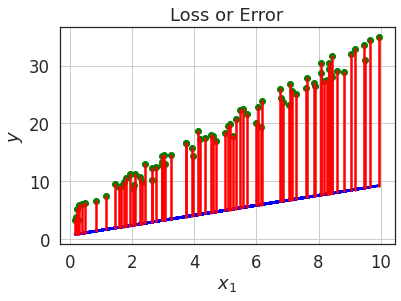

In [32]:
visualize_loss_for_single_feature_model(X_train, y_train, w)

Let's try with the actual weight vector used for data generation process and examine the loss.

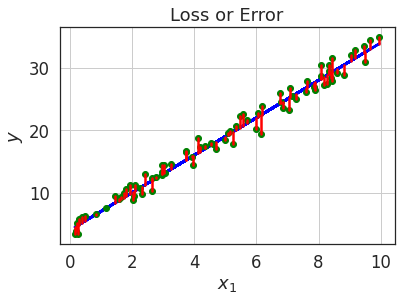

In [33]:
visualize_loss_for_single_feature_model(X_train, y_train, np.array([4, 3]))

# C4: Optimization

Let's implement optimization component of linear regression model. 

It is implemented with one of the following two methods:
* Normal equation method, that sets the partial derivative of the loss function w.r.t. weight vector to 0 and solves the resulting equation to obtain the weight vector.
* Gradient descent method, that iteratively adjusts the weight vector based on the learning rate and the gradient of loss function at the current weight vector. 



Let's generate training data with 100 examples with linear regression model 
of known parameters.  

We will use this data to test optimization procedure, where we compare the estimated weight vectors with the actual weight vector. 

In [34]:
X, y = generate_data(100)
X_train, X_test, y_train, y_test = preprocess(X, y)

## Normal equation

The weight vector is estimated by matrix multiplication of psuedo-inverse of feature matrix and the label vector. 

The vectorized implementation is fairly straight forward.  
*  We make use of `np.linalg.pinv` for calculating psuedoinverse of the feature matrix.

In [35]:
def normal_equation(X, y):
    """Estimates parameters of the linear regression model with normal equation.

    Args:
      X: Feature matrix for given inputs.
      y: Actual label vector.

    Returns:
      Weight vector
    """
    return np.linalg.pinv(X) @ y

We test this function with the generated training set whose weight vector is known to us. 

* We set up the test with feature matrix, label vector and the expected weight vectors.
* Next we estimate the weight vector with `normal_equation` function.
* We test (a) shape and (ii) match between expected and estimated weight vectors.

In [36]:
import unittest


class TestNormalEquation(unittest.TestCase):
    def test_normal_equation(self):
        """
        Test case for weight estimation for linear regression with normal
         equation method.'
        """
        # set up
        feature_matrix = X_train
        label_vector = y_train
        expected_weight_vector = np.array([4.0, 3.0])

        # call
        estimated_weight_vector = normal_equation(feature_matrix, label_vector)

        # asserts
        # test the shape
        self.assertEqual(estimated_weight_vector.shape, (2,))

        # and contents
        np.testing.assert_array_almost_equal(estimated_weight_vector, expected_weight_vector, decimal=0)


unittest.main(argv=[""], defaultTest="TestNormalEquation", verbosity=2, exit=False)

test_normal_equation (__main__.TestNormalEquation)
Test case for weight estimation for linear regression with normal ... ok

----------------------------------------------------------------------
Ran 1 test in 0.021s

OK


## Gradient descent (GD)

GD is implemented as follows:

* Randomly initialize $\mathbf{w}$ to $\mathbf{0}$.
* Iterate until convergence:
  * Calculate partial derivative of loss w.r.t. weight vector.
  * Calculate new values of weights.
  * Update weights to new values *simultaneously*.

We use number of epochs as a convergence criteria in this implementation.

### Partial derivative of loss function

Let's first implement a function to calculate partial derivative of loss function, which is obtained with the following equation:
$$
\frac{\partial}{\partial \mathbf{w}} J(\mathbf{w}) = \mathbf{X}^T \left(\mathbf{X}\mathbf{w} - \mathbf{y} \right) 
$$

The multiplication of transpose of feature matrix with the difference of predicted and actual label vectors.

In [37]:
def calculate_gradient(X, y, w):
    """Calculates gradients of loss function w.r.t weight vector on training set.

    Arguments:
        X: Feature matrix for training data.
        y: Label vector for training data.
        w: Weight vector

    Returns:
      A vector of gradients.
    """
    return np.transpose(X) @ (predict(X, w) - y)

Let's write a test case for gradient calculation with the following setup:

1. Feature matrix ($\mathbf{X}$): 
\begin{eqnarray}
  \mathbf{X}_{2 \times 4} &=&  \begin{bmatrix}
      1 & 3 & 2 & 5 \\
      1 & 9 & 4 & 7 \\
    \end{bmatrix} \\
\end{eqnarray}

2. Weight vector ($\mathbf{w}$):
\begin{eqnarray}
  \mathbf{w}_{4 \times 1} &=&  \begin{bmatrix}
      1 \\
      1 \\
      1 \\
      1 \\
    \end{bmatrix} \\
\end{eqnarray}

3. Label vector $\mathbf{y}$:
  \begin{eqnarray}
  \mathbf{y}_{2 \times 1} &=&  \begin{bmatrix}
      6 \\
      11
    \end{bmatrix} \\
   \end{eqnarray}



Let's compute the partial derivative of loss $J(\mathbf{w})$ i.e. 
\begin{eqnarray}
  \frac{\partial}{\partial \mathbf{w}} J(\mathbf{w}) &=& \mathbf{X}^T \left(\mathbf{X}\mathbf{w} - \mathbf{y} \right)  \\
     &=&  \begin{bmatrix}
      1 & 1 \\
      3 & 9 \\
      2 & 4 \\
      5 & 7 \\
    \end{bmatrix}      
     \left( \begin{bmatrix}
        \color{blue}{1} & \color{blue}{3} & \color{blue}{2} & \color{blue}{5} \\
        \color{purple}{1} & \color{purple}{9} & \color{purple}{4} & \color{purple}{7} \\
      \end{bmatrix}
    \times 
    \begin{bmatrix}
      \color{red}{1} \\
      \color{red}{1} \\
      \color{red}{1} \\
      \color{red}{1} 
    \end{bmatrix} - \begin{bmatrix}
      6 \\
      11
    \end{bmatrix}
      \right) \\
    &=& \begin{bmatrix}
      1 & 1 \\
      3 & 9 \\
      2 & 4 \\
      5 & 7 \\
    \end{bmatrix} \left(
      \begin{bmatrix}
      11 \\
      21
    \end{bmatrix} - 
    \begin{bmatrix}
      6 \\
      11
    \end{bmatrix}
      \right) \\
    &=& \begin{bmatrix}
      1 & 1 \\
      3 & 9 \\
      2 & 4 \\
      5 & 7 \\
    \end{bmatrix}
      \left(
      \begin{bmatrix}
      5 \\
      10
    \end{bmatrix} 
      \right)  \\
  &=& 
      \begin{bmatrix}
      1 \times 5 + 1 \times 10 \\
      3 \times 5 + 9 \times 10 \\
      2 \times 5 + 4 \times 10 \\
      5 \times 5 + 7 \times 10 \\
    \end{bmatrix} \\
  &=& 
      \begin{bmatrix}
      15 \\
      105 \\
      50 \\
      95 \\
    \end{bmatrix} \\
\end{eqnarray}

In [38]:
class TestCalculateGradient(unittest.TestCase):
    def test_calculate_gradient(self):
        """
        Test case for gradient calculation.'
        """
        # set up
        feature_matrix = np.array([[1, 3, 2, 5], [1, 9, 4, 7]])
        weight_vector = np.array([1, 1, 1, 1])
        label_vector = np.array([6, 11])
        expected_grad = np.array([15, 105, 50, 95])

        # call
        grad = calculate_gradient(feature_matrix, label_vector, weight_vector)

        # asserts
        # test the shape
        self.assertEqual(grad.shape, (4,))

        # and contents
        np.testing.assert_array_almost_equal(expected_grad, grad, decimal=0)


unittest.main(argv=[""], defaultTest="TestCalculateGradient", verbosity=2, exit=False)

test_calculate_gradient (__main__.TestCalculateGradient)
Test case for gradient calculation.' ... ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


### Weight updates

Next let's implement the weight update part:
* We obtain the new weight from the old one by substracting gradient weighted by the learning rate.


In [39]:
def update_weights(w, grad, lr):
    """Updates the weights based on the gradient of loss function.

    Weight updates are carried out with the following formula:
        w_new := w_old - lr * grad

    Args:
      1. w: weight vector
      2. grad: gradient of loss w.r.t. w
      3. lr: learning rate

    Returns:
      Updated weight vector
    """
    return w - lr * grad

Let's workout a weight update for:

1. Weight vector ($\mathbf{w}$):
\begin{eqnarray}
  \mathbf{w}_{4 \times 1} &=&  \begin{bmatrix}
      1 \\
      1 \\
      1 \\
      1 \\
    \end{bmatrix} \\
\end{eqnarray}

2. Grad vector $\mathbf{g}$:
  \begin{eqnarray}
  {\mathbf{g}}_{4 \times 1} &=&  \begin{bmatrix}
      15 \\
      105 \\
      50 \\
      95
    \end{bmatrix} \\
   \end{eqnarray}

3. Learning rate = 0.001


The updated weights are given by:\begin{eqnarray}
  \mathbf{w} &:=& \mathbf{w}^\mathrm{(old)} - \alpha \ \mathbf{g} \\
     &=&  \begin{bmatrix}
      1 \\
      1 \\
      1 \\
      1 \\
    \end{bmatrix} - 0.001 \times
    \begin{bmatrix}
      15 \\
      105 \\
      50 \\
      95 \\
      \end{bmatrix}\\
    &=& \begin{bmatrix}
      1 - 0.001 \times 15  \\
      1 - 0.001 \times 105 \\
      1 - 0.001 \times 50  \\
      1 - 0.001 \times 95  \\
    \end{bmatrix} \\
    &=& \begin{bmatrix}
      1 - 0.015 \\
      1 - 0.105 \\
      1 - 0.05 \\
      1 - 0.095 \\
    \end{bmatrix}\\
    &=& 
      \begin{bmatrix}
      0.985 \\
      0.895 \\
      0.95 \\
      0.905 \\
    \end{bmatrix} \\
\end{eqnarray}

In [40]:
class TestUpdateWeights(unittest.TestCase):
    def test_update_weights(self):
        """
        Test case for weight update in GD.'
        """
        # set up
        weight_vector = np.array([1, 1, 1, 1])
        grad_vector = np.array([15, 105, 50, 95])
        lr = 0.001
        expected_w_new = np.array([0.985, 0.895, 0.95, 0.905])

        # call
        w_new = update_weights(weight_vector, grad_vector, lr)

        # asserts
        # test the shape
        self.assertEqual(expected_w_new.shape, (4,))

        # and contents
        np.testing.assert_array_almost_equal(expected_w_new, w_new, decimal=1)


unittest.main(argv=[""], defaultTest="TestUpdateWeights", verbosity=2, exit=False)

test_update_weights (__main__.TestUpdateWeights)
Test case for weight update in GD.' ... ok

----------------------------------------------------------------------
Ran 1 test in 0.005s

OK


With these building blocks in place, let's implement gradient descent procedure:

In [41]:
def gradient_descent(X: np.ndarray, y: np.ndarray, lr: float, num_epochs: int):
    """Estimates parameters of linear regression model through gradient descent.

    Arguments:
      X: Feature matrix for training data.
      y: Label vector for training data.
      lr: learning rate
      num_epochs: Number of training steps

    Returns:
      Weight vector: Final weight vector
      Error vector across different iterations
      Weight vectors across different iterations
    """
    w_all = []  # all parameters across iterations.
    err_all = []  # all errors across iterations.

    # Parameter vector initialized to [0, 0]
    w = np.zeros((X.shape[1]))

    # Gradient descent loop
    print()
    for i in np.arange(0, num_epochs):
        w_all.append(w)

        # Calculate error due to the current weigh vector: Note that here we use
        # loss function to calculate the loss.
        err_all.append(loss(X, y, w))

        # Gradient calculation
        dJdW = calculate_gradient(X, y, w)

        # Print stats every 100 iterations
        if (i % 100) == 0:
            print("Iteration #: %d, loss: %4.2f" % (i, err_all[-1]))

        # Weight vector update.
        w = update_weights(w, dJdW, lr)

    return w, err_all, w_all

In order to test this function, we will use the synthetic training data that was generated earlier.  We know the actual weights, that can be compared against the weights obtained from gradient descent procedure.

In [42]:
class TestGradientDescent(unittest.TestCase):
    def test_gradient_descent(self):
        """
        Test case for weight estimation for linear regression with
        gradient descent method.'
        """
        # set up
        feature_matrix = X_train
        label_vector = y_train
        expected_weights = np.array([4.0, 3.0])

        # call
        w, err_all, w_all = gradient_descent(feature_matrix, label_vector, lr=0.0001, num_epochs=2000)

        # asserts
        # test the shape
        self.assertEqual(w.shape, (2,))

        # and contents
        np.testing.assert_array_almost_equal(expected_weights, w, decimal=0)


unittest.main(argv=[""], defaultTest="TestGradientDescent", verbosity=2, exit=False)

test_gradient_descent (__main__.TestGradientDescent)
Test case for weight estimation for linear regression with ... 


Iteration #: 0, loss: 20200.29
Iteration #: 100, loss: 125.33
Iteration #: 200, loss: 103.74
Iteration #: 300, loss: 87.76
Iteration #: 400, loss: 75.94
Iteration #: 500, loss: 67.20
Iteration #: 600, loss: 60.73
Iteration #: 700, loss: 55.94
Iteration #: 800, loss: 52.40
Iteration #: 900, loss: 49.78
Iteration #: 1000, loss: 47.84
Iteration #: 1100, loss: 46.41
Iteration #: 1200, loss: 45.35
Iteration #: 1300, loss: 44.56
Iteration #: 1400, loss: 43.98
Iteration #: 1500, loss: 43.55
Iteration #: 1600, loss: 43.23
Iteration #: 1700, loss: 43.00
Iteration #: 1800, loss: 42.83
Iteration #: 1900, loss: 42.70


ok

----------------------------------------------------------------------
Ran 1 test in 0.043s

OK


Since we store weights in each iteration, we can use them to plot intermediate models in order to understand the trajectory taken by GD.

In the following code:
* `err_all` contains loss values across all iterations and 
* `w_all` contains weight vectors across all iterations.



In [43]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr=0.00001, num_epochs=200)


Iteration #: 0, loss: 20200.29
Iteration #: 100, loss: 178.86


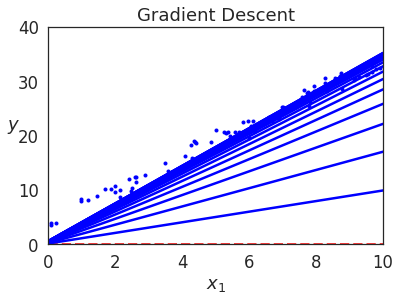

In [44]:
# @title [Plot model trajectory]
X_b = np.c_[np.ones((X.shape[0], 1)), X]  # add x0 = 1 to each instance
X_new = np.array([[0], [10]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance

for j in range(0, len(w_all)):
    if j % 10 != 0:
        continue
    y_hat = predict(X_new_b, w_all[j])
    style = "b-" if j > 0 else "r--"
    plt.plot(X_new_b[:, 1], y_hat, style)

plt.plot(X_train[:, 1], y_train, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("Gradient Descent", fontsize=18)
plt.axis([0, 10, 0, 40])
plt.show()

Let's plot the learning curves.

In [45]:
def plot_learning_curves(err_all):
    plt.plot(err_all)
    plt.xlabel("iteration #")
    plt.ylabel("Loss: $J(\mathbf{w})$")


Iteration #: 0, loss: 20200.29
Iteration #: 100, loss: 125.33
Iteration #: 200, loss: 103.74
Iteration #: 300, loss: 87.76
Iteration #: 400, loss: 75.94
Iteration #: 500, loss: 67.20
Iteration #: 600, loss: 60.73
Iteration #: 700, loss: 55.94
Iteration #: 800, loss: 52.40
Iteration #: 900, loss: 49.78
Iteration #: 1000, loss: 47.84
Iteration #: 1100, loss: 46.41
Iteration #: 1200, loss: 45.35
Iteration #: 1300, loss: 44.56
Iteration #: 1400, loss: 43.98
Iteration #: 1500, loss: 43.55
Iteration #: 1600, loss: 43.23
Iteration #: 1700, loss: 43.00
Iteration #: 1800, loss: 42.83
Iteration #: 1900, loss: 42.70


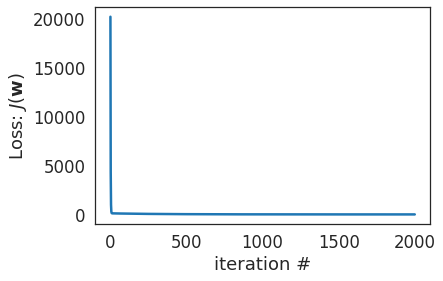

In [46]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr=0.0001, num_epochs=2000)
plot_learning_curves(err_all)

## Learning rate and convergence

Let's vary the learning rate and observe change in the convergence characteristics of GD.

We will use:
* $\alpha=\{1e-6, 1e-4, 1e-1\}$ to run GD for 2000 epochs each.
* Compare the convergence characteristics.


Iteration #: 0, loss: 20200.29
Iteration #: 100, loss: 10630.93
Iteration #: 200, loss: 5629.42
Iteration #: 300, loss: 3015.27
Iteration #: 400, loss: 1648.85
Iteration #: 500, loss: 934.54
Iteration #: 600, loss: 561.06
Iteration #: 700, loss: 365.70
Iteration #: 800, loss: 263.44
Iteration #: 900, loss: 209.84
Iteration #: 1000, loss: 181.67
Iteration #: 1100, loss: 166.79
Iteration #: 1200, loss: 158.86
Iteration #: 1300, loss: 154.56
Iteration #: 1400, loss: 152.16
Iteration #: 1500, loss: 150.75
Iteration #: 1600, loss: 149.86
Iteration #: 1700, loss: 149.24
Iteration #: 1800, loss: 148.77
Iteration #: 1900, loss: 148.37


Text(0.5, 1.0, 'lr=1e-6')

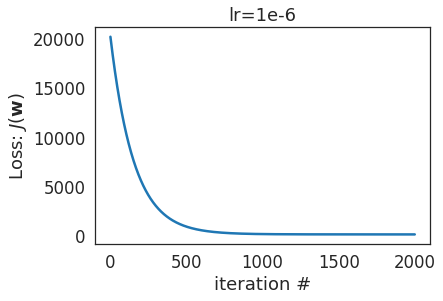

In [47]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr=1e-6, num_epochs=2000)
plot_learning_curves(err_all)
plt.title("lr=1e-6")


Iteration #: 0, loss: 20200.29
Iteration #: 100, loss: 125.33
Iteration #: 200, loss: 103.74
Iteration #: 300, loss: 87.76
Iteration #: 400, loss: 75.94
Iteration #: 500, loss: 67.20
Iteration #: 600, loss: 60.73
Iteration #: 700, loss: 55.94
Iteration #: 800, loss: 52.40
Iteration #: 900, loss: 49.78
Iteration #: 1000, loss: 47.84
Iteration #: 1100, loss: 46.41
Iteration #: 1200, loss: 45.35
Iteration #: 1300, loss: 44.56
Iteration #: 1400, loss: 43.98
Iteration #: 1500, loss: 43.55
Iteration #: 1600, loss: 43.23
Iteration #: 1700, loss: 43.00
Iteration #: 1800, loss: 42.83
Iteration #: 1900, loss: 42.70


Text(0.5, 1.0, 'lr=1e-4')

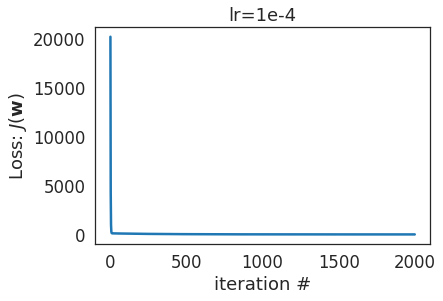

In [48]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr=1e-4, num_epochs=2000)
plot_learning_curves(err_all)

plt.title("lr=1e-4")

Let's try learning rate $\alpha=1e-1$ (Doesn't converge)


Iteration #: 0, loss: 20200.29
Iteration #: 100, loss:  inf
Iteration #: 200, loss:  nan
Iteration #: 300, loss:  nan
Iteration #: 400, loss:  nan
Iteration #: 500, loss:  nan
Iteration #: 600, loss:  nan
Iteration #: 700, loss:  nan
Iteration #: 800, loss:  nan
Iteration #: 900, loss:  nan
Iteration #: 1000, loss:  nan
Iteration #: 1100, loss:  nan
Iteration #: 1200, loss:  nan
Iteration #: 1300, loss:  nan
Iteration #: 1400, loss:  nan
Iteration #: 1500, loss:  nan
Iteration #: 1600, loss:  nan
Iteration #: 1700, loss:  nan
Iteration #: 1800, loss:  nan
Iteration #: 1900, loss:  nan


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in matmul
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in matmul
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in subtract
  from ipykernel import kernelapp as app


Text(0.5, 1.0, 'lr=0.1')

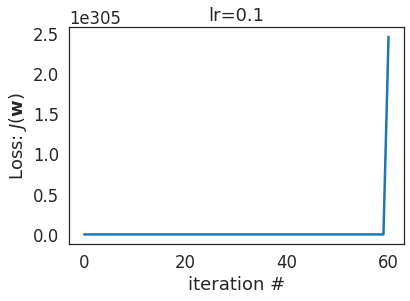

In [49]:
w, err_all, w_all = gradient_descent(X_train, y_train, lr=1e-1, num_epochs=2000)
plot_learning_curves(err_all)
plt.title("lr=0.1")

# Linear regression: combining all components

Let's combine all components that we implemented in last few sections in a single place and make it available for training linear regression model on different datasets.



In [50]:
from IPython.display import display, Math, Latex  # Imported for proper rendering of latex in colab.

import numpy as np

# Import for generating plots
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Let's combine implementation of different components of Linear Regression that we implemented so far into a single `LinearRegression` class.

In [51]:
class LinReg(object):
    """
    Linear regression model
    -----------------------
    y = X@w
    X: A feature matrix
    w: weight vector
    y: label vector
    """

    def __init__(self):
        self.t0 = 200
        self.t1 = 100000

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Prediction of output label for a given input.

        Args:
          X: Feature matrix for given inputs.

        Returns:
          y: Output label vector as predicted by the given model.
        """
        y = X @ self.w
        return y

    def loss(self, X: np.ndarray, y: np.ndarray) -> float:
        """Calculates loss for a model based on known labels.

        Args:
          X: Feature matrix for given inputs.
          y: Output label vector as predicted by the given model.

        Returns:
          Loss
        """
        e = y - self.predict(X)
        return (1 / 2) * (np.transpose(e) @ e)

    def rmse(self, X: np.ndarray, y: np.ndarray) -> float:
        """Calculates root mean squared error of prediction w.r.t. actual label.

        Args:
          X: Feature matrix for given inputs.
          y: Output label vector as predicted by the given model.

        Returns:
          Loss
        """
        return np.sqrt((2 / X.shape[0]) * self.loss(X, y))

    def fit(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Estimates parameters of the linear regression model with normal equation.

        Args:
          X: Feature matrix for given inputs.
          y: Output label vector as predicted by the given model.

        Returns:
          Weight vector
        """
        self.w = np.linalg.pinv(X) @ y
        return self.w

    def calculate_gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Calculates gradients of loss function w.r.t weight vector on training set.

        Arguments:
            X: Feature matrix for training data.
            y: Label vector for training data.

        Returns:
          A vector of gradients.
        """
        return np.transpose(X) @ (self.predict(X) - y)

    def update_weights(self, grad: np.ndarray, lr: float) -> np.ndarray:
        """Updates the weights based on the gradient of loss function.

        Weight updates are carried out with the following formula:
            w_new := w_old - lr * grad

        Args:
          2. grad: gradient of loss w.r.t. w
          3. lr: learning rate

        Returns:
          Updated weight vector
        """
        return self.w - lr * grad

    def learning_schedule(self, t):
        return self.t0 / (t + self.t1)

    def gd(self, X: np.ndarray, y: np.ndarray, num_epochs: int, lr: float) -> np.ndarray:
        """Estimates parameters of linear regression model through gradient descent.

        Args:
          X: Feature matrix for training data.
          y: Label vector for training data.
          num_epochs: Number of training steps
          lr: Learning rate

        Returns:
          Weight vector: Final weight vector
        """
        self.w = np.zeros((X.shape[1]))
        self.w_all = []
        self.err_all = []
        for i in np.arange(0, num_epochs):
            dJdW = self.calculate_gradient(X, y)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X, y))
            self.w = self.update_weights(dJdW, lr)
        return self.w

    def mbgd(self, X: np.ndarray, y: np.ndarray, num_epochs: int, batch_size: int) -> np.ndarray:
        """Estimates parameters of linear regression model through gradient descent.

        Args:
          X: Feature matrix for training data.
          y: Label vector for training data.
          num_epochs: Number of training steps
          batch_size: Number of examples in a batch

        Returns:
          Weight vector: Final weight vector
        """
        self.w = np.zeros((X.shape[1]))
        self.w_all = []
        self.err_all = []
        mini_batch_id = 0

        for epoch in range(num_epochs):
            shuffled_indices = np.random.permutation(X.shape[0])
            X_shuffled = X[shuffled_indices]
            y_shuffled = y[shuffled_indices]
            for i in range(0, X.shape[0], batch_size):
                mini_batch_id += 1
                xi = X_shuffled[i : i + batch_size]
                yi = y_shuffled[i : i + batch_size]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(xi, yi))

                dJdW = 2 / batch_size * self.calculate_gradient(xi, yi)
                self.w = self.update_weights(dJdW, self.learning_schedule(mini_batch_id))
        return self.w

    def sgd(self, X: np.ndarray, y: np.ndarray, num_epochs: int) -> np.ndarray:
        """Estimates parameters of linear regression model through gradient descent.

        Args:
          X: Feature matrix for training data.
          y: Label vector for training data.
          num_epochs: Number of training steps
          batch_size: Number of examples in a batch

        Returns:
          Weight vector: Final weight vector
        """
        # Parameter vector initialized to [0, 0]
        self.w = np.zeros((X.shape[1]))
        self.w_all = []
        self.err_all = []
        for epoch in range(num_epochs):
            for i in range(X.shape[0]):
                random_index = np.random.randint(X.shape[0])
                xi = X[random_index : random_index + 1]
                yi = y[random_index : random_index + 1]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(xi, yi))

                gradients = 2 * self.calculate_gradient(xi, yi)
                lr = self.learning_schedule(epoch * X.shape[0] + i)
                self.w = self.update_weights(gradients, lr)

        return self.w

In [52]:
X, y = generate_data(100)
X_train, X_test, y_train, y_test = preprocess(X, y)

Let's compare weight vectors obtained by normal equation, GD, MBGD and SGD:

In [53]:
# normal equation
lin_reg = LinReg()
lin_reg.fit(X_train, y_train)
print("Weight vector (normal equation): ", lin_reg.w)

Weight vector (normal equation):  [4.40391715 2.92509303]


In [54]:
lin_reg.gd(X_train, y_train, 1000, lr=1e-4)
print("Weight vector (gradient descent): ", lin_reg.w)

Weight vector (gradient descent):  [3.69922564 3.03252769]


In [55]:
lin_reg.mbgd(X_train, y_train, 1000, 16)
print("Weight vector (mini-batch gradient descent): ", lin_reg.w)

Weight vector (mini-batch gradient descent):  [4.34252109 2.93310427]


In [56]:
lin_reg.sgd(X_train, y_train, 1000)
print("Weight vector (sgd): ", lin_reg.w)

Weight vector (sgd):  [4.43994181 2.90445985]


## Linear regression on multiple features and single label

In [57]:
# @title Plot learning curves.
def plot_learning_curves(err_all):
    plt.plot(err_all)
    plt.xlabel("iteration #")
    plt.ylabel("Loss: $J(\mathbf{w})$")

In [58]:
from sklearn.datasets import make_regression

X, y, coef = make_regression(
    n_samples=200, n_features=10, n_informative=10, n_targets=1, shuffle=True, coef=True, noise=0.5, random_state=0
)

In [59]:
print("Shape of feature matrix: ", X.shape)
print("Shape of label vector: ", y.shape)
print("Shape of coef vector: ", coef.shape)

Shape of feature matrix:  (200, 10)
Shape of label vector:  (200,)
Shape of coef vector:  (10,)


In [60]:
print("Weight vector used for data generation:", coef)

Weight vector used for data generation: [40.05104636 10.32532207 51.90989393  6.18447832 41.09157343 28.46940664
 88.97621358  9.68032193 15.48694157 44.96944303]


We will compare it with weight vector estimated from different methods.

In [61]:
X_train, X_test, y_train, y_test = preprocess(X, y)

In [62]:
# Normal equation for weight vector estimation
lin_reg.fit(X_train, y_train)
print("Weight vector (normal equation): ", lin_reg.w)

Weight vector (normal equation):  [4.30868690e-03 4.00335228e+01 1.03086790e+01 5.19091277e+01
 6.29286567e+00 4.11625781e+01 2.84422862e+01 8.89543306e+01
 9.75752481e+00 1.54723974e+01 4.49980952e+01]


In [63]:
# check if these coefficients are close to the ones used for data generation.
np.testing.assert_almost_equal(coef, lin_reg.w[1:], decimal=0)

In [64]:
# GD for weight vector estimation
lin_reg.gd(X_train, y_train, 1000, lr=1e-4)
print("Weight vector (gradient descent): ", lin_reg.w)

Weight vector (gradient descent):  [4.23513204e-03 4.00335497e+01 1.03081869e+01 5.19092201e+01
 6.29241093e+00 4.11619488e+01 2.84422549e+01 8.89543222e+01
 9.75811687e+00 1.54722408e+01 4.49977615e+01]


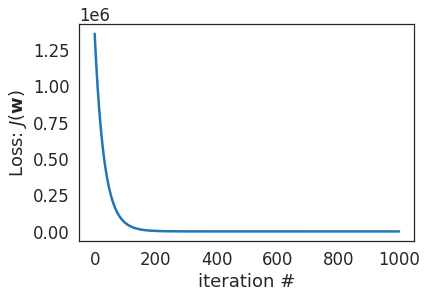

In [65]:
plot_learning_curves(lin_reg.err_all[:1000])

In [66]:
# check if these coefficients are close to the ones used for data generation.
np.testing.assert_almost_equal(coef, lin_reg.w[1:], decimal=1)

In [67]:
# MBGD for weight vector estimation
lin_reg.mbgd(X_train, y_train, 1000, 16)
print("Weight vector (mini-batch gradient descent): ", lin_reg.w)

Weight vector (mini-batch gradient descent):  [4.32776422e-03 4.00334261e+01 1.03087000e+01 5.19090812e+01
 6.29292578e+00 4.11625561e+01 2.84423184e+01 8.89544085e+01
 9.75751021e+00 1.54725483e+01 4.49981559e+01]


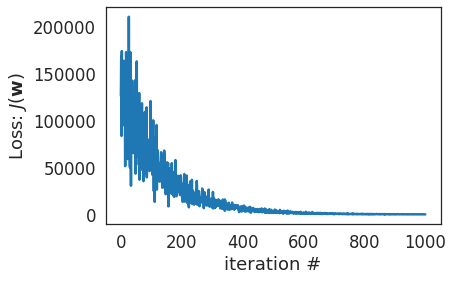

In [68]:
plot_learning_curves(lin_reg.err_all[:1000])

In [69]:
# check if these coefficients are close to the ones used for data generation.
np.testing.assert_almost_equal(coef, lin_reg.w[1:], decimal=0)

In [70]:
# SGD for weight vector estimation
lin_reg.sgd(X_train, y_train, 1000)
print("Weight vector (sgd): ", lin_reg.w)

Weight vector (sgd):  [-1.76539732e-02  4.00182258e+01  1.03026464e+01  5.19197207e+01
  6.29637150e+00  4.11677078e+01  2.84447965e+01  8.89409755e+01
  9.73540047e+00  1.54983459e+01  4.49941318e+01]


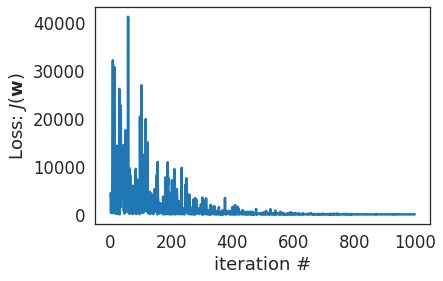

In [71]:
plot_learning_curves(lin_reg.err_all[:1000])

In [72]:
# check if these coefficients are close to the ones used for data generation.
np.testing.assert_almost_equal(coef, lin_reg.w[1:], decimal=0)